In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('solar_test.csv')
train = pd.read_csv('solar_train.csv')
ejemplo = pd.read_csv('submission_example.csv')

In [3]:
test.head()

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,2,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,3,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,4,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


In [4]:
train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24514 entries, 0 to 24513
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                24514 non-null  int64  
 1   Data                    24514 non-null  object 
 2   Time                    24514 non-null  object 
 3   Radiation               24514 non-null  float64
 4   Temperature             24514 non-null  int64  
 5   Pressure                24514 non-null  float64
 6   Humidity                24514 non-null  int64  
 7   WindDirection(Degrees)  24514 non-null  float64
 8   Speed                   24514 non-null  float64
 9   TimeSunRise             24514 non-null  object 
 10  TimeSunSet              24514 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.1+ MB


In [6]:
print('dimensiones train:',train.shape,'\ndimensiones test:  ',test.shape)

dimensiones train: (24514, 11) 
dimensiones test:   (8172, 11)


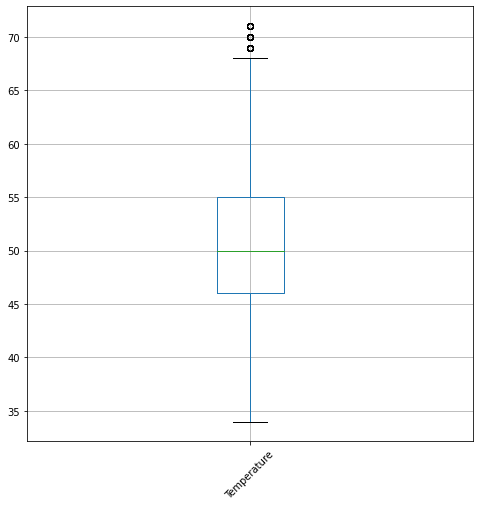

In [7]:
plt.figure(figsize=(8, 8))
train.boxplot(column=['Temperature'])
plt.xticks(rotation=45)
plt.show();

In [8]:
len(train.Temperature)

24514

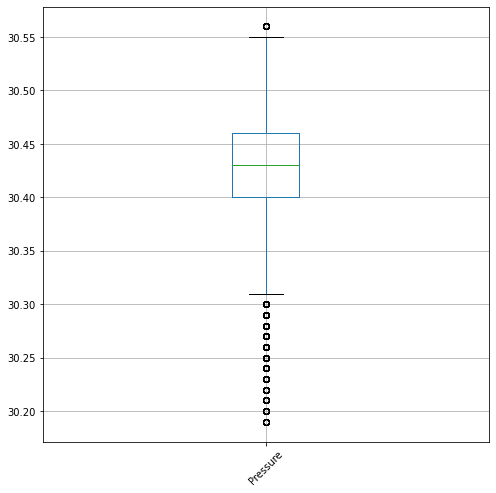

In [9]:
plt.figure(figsize=(8, 8))
train.boxplot(column=['Pressure'])
plt.xticks(rotation=45)
plt.show();

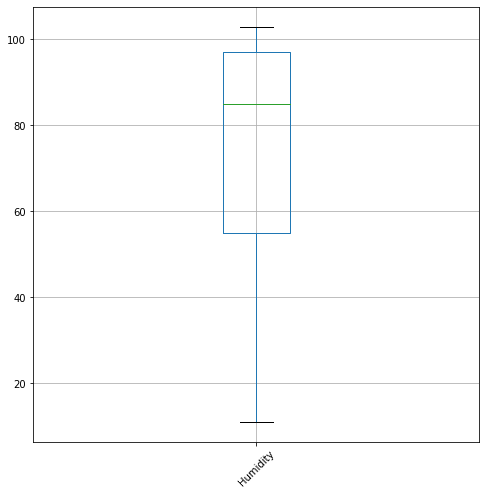

In [10]:
plt.figure(figsize=(8, 8))
train.boxplot(column=['Humidity'])
plt.xticks(rotation=45)
plt.show();

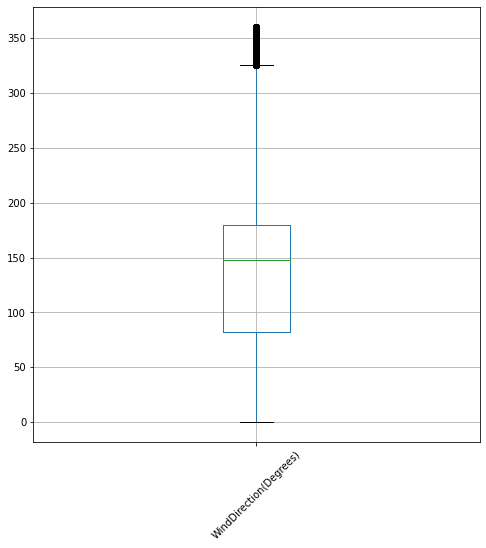

In [11]:
plt.figure(figsize=(8, 8))
train.boxplot(column=['WindDirection(Degrees)'])
plt.xticks(rotation=45)
plt.show();

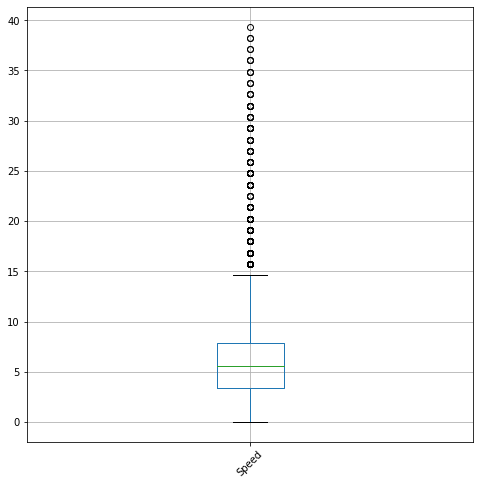

In [12]:
plt.figure(figsize=(8, 8))
train.boxplot(column=['Speed'])
plt.xticks(rotation=45)
plt.show();

In [13]:
test.head()

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,2,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,3,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,4,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


In [14]:
train.Data = train.Data.str.replace(' 12:00:00 AM','')
train['id']= [i for i in range(len(train))]
train['type']='train'


test.Data = test.Data.str.replace(' 12:00:00 AM','')
test['type']='test'
test['Radiation']= 0

In [15]:
train = train[['id','UNIXTime','Data','Time','Temperature','Pressure','Humidity','WindDirection(Degrees)',
              'Speed','TimeSunRise','TimeSunSet','Radiation','type']]

In [16]:
test = test[['id','UNIXTime','Data','Time','Temperature','Pressure','Humidity','WindDirection(Degrees)',
              'Speed','TimeSunRise','TimeSunSet','Radiation','type']]

In [17]:
test.head(1)

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,type
0,0,1478720107,11/9/2016,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00,0,test


In [18]:
train.head(1)

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,type
0,0,1475175023,9/29/2016,08:50:23,61,30.46,41,14.96,6.75,06:13:00,18:13:00,634.99,train


In [19]:
combinado = pd.concat([train,test], axis=0, join='outer', ignore_index=True)

In [20]:
print('dimensiones train:',train.shape,'\ndimensiones test:  ',test.shape)

dimensiones train: (24514, 13) 
dimensiones test:   (8172, 13)


In [21]:
combinado.shape

(32686, 13)

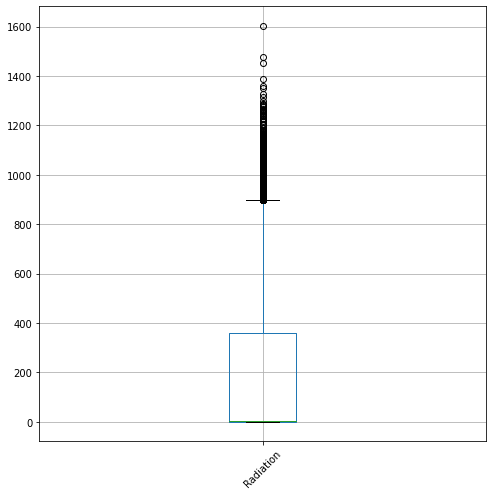

In [22]:
plt.figure(figsize=(8, 8))
train.boxplot(column=['Radiation'])
plt.xticks(rotation=45)
plt.show();

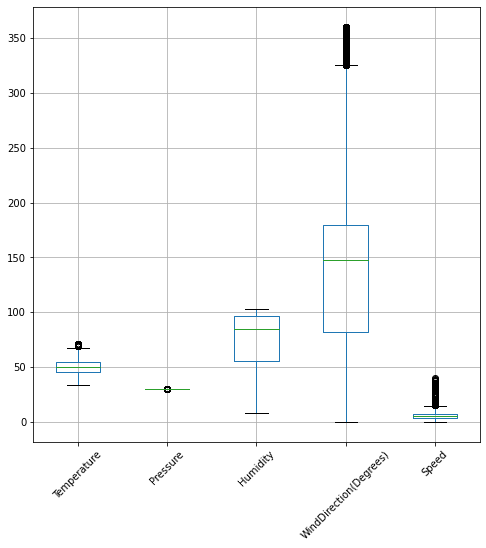

In [23]:
plt.figure(figsize=(8, 8))
combinado.boxplot(column=['Temperature','Pressure','Humidity','WindDirection(Degrees)',
              'Speed'])
plt.xticks(rotation=45)
plt.show();

In [24]:
def minutos(hora):
    minutos = hora.split(':')
    minutos = int(minutos[0])*60 + int(minutos[1])
    return int(minutos)

In [25]:
combinado.TimeSunRise = combinado.TimeSunRise.apply(minutos)
combinado.TimeSunSet = combinado.TimeSunSet.apply(minutos)

In [26]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32686 non-null  int64  
 1   UNIXTime                32686 non-null  int64  
 2   Data                    32686 non-null  object 
 3   Time                    32686 non-null  object 
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  int64  
 10  TimeSunSet              32686 non-null  int64  
 11  Radiation               32686 non-null  float64
 12  type                    32686 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 3.2+ MB


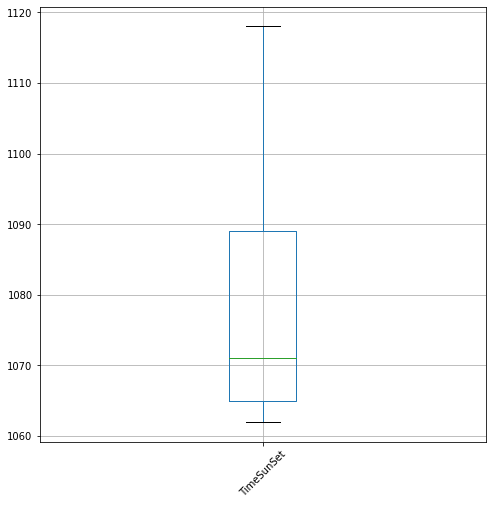

In [27]:
plt.figure(figsize=(8, 8))
combinado.boxplot(column=['TimeSunSet'])
plt.xticks(rotation=45)
plt.show();

In [28]:
# normalizacion

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [29]:
combinado.drop(columns=['Data','Time'],inplace=True)

In [30]:
#rob = RobustScaler()
#combinado[['UNIXTime','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','TimeSunRise','TimeSunSet']] = rob.fit_transform(combinado[['UNIXTime','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','TimeSunRise','TimeSunSet']])



In [31]:
combinado.head()

,id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,type
0,0,1475175023,61,30.46,41,14.96,6.75,373,1093,634.99,train
1,1,1481799902,37,30.26,70,207.43,5.62,410,1066,1.27,train
2,2,1478339417,47,30.49,33,168.20,5.62,385,1067,1.21,train
3,3,1472887208,54,30.46,101,152.60,3.37,367,1117,1.67,train
4,4,1478724901,62,30.47,36,291.95,7.87,388,1065,839.78,train


In [32]:
train_t = combinado[combinado.type=='test']

In [33]:
train_n = combinado[combinado.type=='train']
train_n.head()

,id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,type
0,0,1475175023,61,30.46,41,14.96,6.75,373,1093,634.99,train
1,1,1481799902,37,30.26,70,207.43,5.62,410,1066,1.27,train
2,2,1478339417,47,30.49,33,168.20,5.62,385,1067,1.21,train
3,3,1472887208,54,30.46,101,152.60,3.37,367,1117,1.67,train
4,4,1478724901,62,30.47,36,291.95,7.87,388,1065,839.78,train


In [34]:
X_train = train_n.drop(columns=['id','type','Radiation'])
y_train = train_n.Radiation

In [35]:
from sklearn.model_selection import train_test_split as tts
X_traintrain, X_testtrain, y_traintrain, y_testtrain = tts(X_train, y_train, test_size=0.1, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score

In [37]:
from sklearn.metrics import mean_squared_error as mse

In [38]:
linreg=LinReg()
linreg.fit(X_traintrain, y_traintrain)
train_score=linreg.score(X_traintrain, y_traintrain) #R2
test_score=linreg.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=linreg.predict(X_testtrain)
r2_score(y_testtrain,y_pred)

train R2: 0.5988729871084019 -- test R2: 0.5893678581167352


0.5893678581167352

In [39]:
mse(y_testtrain, y_pred)

40292.133633397025

In [40]:
from sklearn.linear_model import SGDRegressor as SGDR

In [41]:
sgdr=SGDR()
sgdr.fit(X_traintrain, y_traintrain)
train_score=sgdr.score(X_traintrain, y_traintrain) #R2
test_score=sgdr.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=sgdr.predict(X_testtrain)
r2_score(y_testtrain,y_pred)

train R2: -4.3627256975325915e+48 -- test R2: -4.4525893729621567e+48


-4.4525893729621567e+48

In [42]:
mse(y_testtrain, y_pred)

4.368979135613696e+53

In [43]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [44]:
lasso=Lasso()
lasso.fit(X_traintrain, y_traintrain)
train_score=lasso.score(X_traintrain, y_traintrain) #R2
test_score=lasso.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=lasso.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: 0.594409679295355 -- test R2: 0.5864847438519764


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449962529.0487996, tolerance: 220920.92789161913
  model = cd_fast.enet_coordinate_descent(


40575.031179369056

In [45]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_traintrain, y_traintrain)
train_score=ridge.score(X_traintrain, y_traintrain) #R2
test_score=ridge.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=ridge.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: 0.5988709630011141 -- test R2: 0.5894000907922643


40288.97089201047

In [46]:
# ElasticNet L1+L2
elastic=ElasticNet()
elastic.fit(X_traintrain, y_traintrain)
train_score=elastic.score(X_traintrain, y_traintrain) #R2
test_score=elastic.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=elastic.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: 0.5934893917575683 -- test R2: 0.5857159505974182


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458683639.04772764, tolerance: 220920.92789161913
  model = cd_fast.enet_coordinate_descent(


40650.46687324106

In [47]:
from sklearn.svm import SVR 

In [48]:
svr=SVR()
svr.fit(X_traintrain, y_traintrain)
train_score=svr.score(X_traintrain, y_traintrain) #R2
test_score=svr.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=svr.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: -0.42272787254252475 -- test R2: -0.4161416348670642


138954.94817865966

In [49]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [50]:
rfr = RFR()
rfr.fit(X_traintrain, y_traintrain)
train_score=rfr.score(X_traintrain, y_traintrain) #R2
test_score=rfr.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=rfr.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: 0.9865837482197686 -- test R2: 0.9060791468655441


9215.721760358327

In [51]:
from sklearn.tree import ExtraTreeRegressor as ETR

In [118]:
etr = ETR()
etr.fit(X_traintrain, y_traintrain)
train_score=etr.score(X_traintrain, y_traintrain) #R2
test_score=etr.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=etr.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: 1.0 -- test R2: 0.8099975547834246


18643.46000346656

In [53]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

In [54]:
knnr=KNNR(n_neighbors=7)
knnr.fit(X_traintrain, y_traintrain)
train_score=knnr.score(X_traintrain, y_traintrain) #R2
test_score=knnr.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=knnr.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: 0.9582227529635404 -- test R2: 0.9474830833994586


5153.075967162167

In [55]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [56]:
gbr=GBR()
gbr.fit(X_traintrain, y_traintrain)
train_score=gbr.score(X_traintrain, y_traintrain) #R2
test_score=gbr.score(X_testtrain, y_testtrain)
print ('train R2:',train_score, '-- test R2:', test_score)
y_pred=gbr.predict(X_testtrain)
mse(y_testtrain, y_pred)

train R2: 0.771039369110508 -- test R2: 0.7584784489764956


23698.62856948694

In [57]:
from mlxtend.regressor import StackingRegressor

import warnings
warnings.simplefilter('ignore')

In [78]:
metamodelo=StackingRegressor(regressors=[etr, rfr, knnr, gbr], meta_regressor=rfr)

In [79]:
metamodelo.fit(X_traintrain, y_traintrain)

StackingRegressor(meta_regressor=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=500,
                    

In [80]:
metamodelo.score(X_testtrain, y_testtrain)

0.6685254213060038

# Preparación para submit

In [81]:
combinado.head()

,id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,type
0,0,1475175023,61,30.46,41,14.96,6.75,373,1093,634.99,train
1,1,1481799902,37,30.26,70,207.43,5.62,410,1066,1.27,train
2,2,1478339417,47,30.49,33,168.20,5.62,385,1067,1.21,train
3,3,1472887208,54,30.46,101,152.60,3.37,367,1117,1.67,train
4,4,1478724901,62,30.47,36,291.95,7.87,388,1065,839.78,train


In [82]:
train_t = combinado[combinado.type=='test']
train_n = combinado[combinado.type=='train']

In [83]:
X_train = train_n.drop(columns=['id','type','Radiation'])
y_train = train_n.Radiation

In [84]:
X_test = train_t.drop(columns=['id','type','Radiation'])

In [85]:
X_train.shape

(24514, 8)

In [86]:
y_train.shape

(24514,)

In [107]:
knnr=KNNR(n_neighbors=2)
knnr.fit(X_train, y_train)
train_score=knnr.score(X_train, y_train) #R2
print ('train R2:',train_score)
y_pred=knnr.predict(X_test)

train R2: 0.9810494842373547


In [108]:
y_pred.shape

(8172,)

In [109]:
train_t.shape

(8172, 11)

In [110]:
final = pd.DataFrame(y_pred,columns=['Radiation'])
final.head()

,Radiation
0,664.140
1,1177.845
2,1.225
3,5.155
4,1.225


In [111]:
final['id'] = [i for i in range(len(final))]
final.head()

,Radiation,id
0,664.140,0
1,1177.845,1
2,1.225,2
3,5.155,3
4,1.225,4


In [112]:
final = final[['id','Radiation']]

In [113]:
final.head()

,id,Radiation
0,0,664.140
1,1,1177.845
2,2,1.225
3,3,5.155
4,4,1.225


In [114]:
ejemplo.head()

,id,Radiation
0,0,1041.317337
1,1,1064.230693
2,2,610.828947
3,3,602.742249
4,4,562.312327


In [115]:
ejemplo.shape == final.shape

True

In [116]:
final.to_csv('final_ec_v6.csv',index=False)

In [117]:
X_train.corr()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,1.000000,-0.369919,-0.331841,-0.061548,0.156535,0.173960,0.981921,-0.848430
Temperature,-0.369919,1.000000,0.310439,-0.281192,-0.270070,-0.032578,-0.381248,0.288257
Pressure,-0.331841,0.310439,1.000000,-0.222480,-0.229222,-0.082508,-0.380058,0.148550
Humidity,-0.061548,-0.281192,-0.222480,1.000000,0.001631,-0.211095,-0.022255,0.134286
WindDirection(Degrees),0.156535,-0.270070,-0.229222,0.001631,1.000000,0.071282,0.180937,-0.072363
Speed,0.173960,-0.032578,-0.082508,-0.211095,0.071282,1.000000,0.166977,-0.160341
TimeSunRise,0.981921,-0.381248,-0.380058,-0.022255,0.180937,0.166977,1.000000,-0.739629
TimeSunSet,-0.848430,0.288257,0.148550,0.134286,-0.072363,-0.160341,-0.739629,1.000000
